Preview of the Iris Dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.6717
Root Mean Squared Error (RMSE): 0.8196
R-squared (R^2): 0.0138


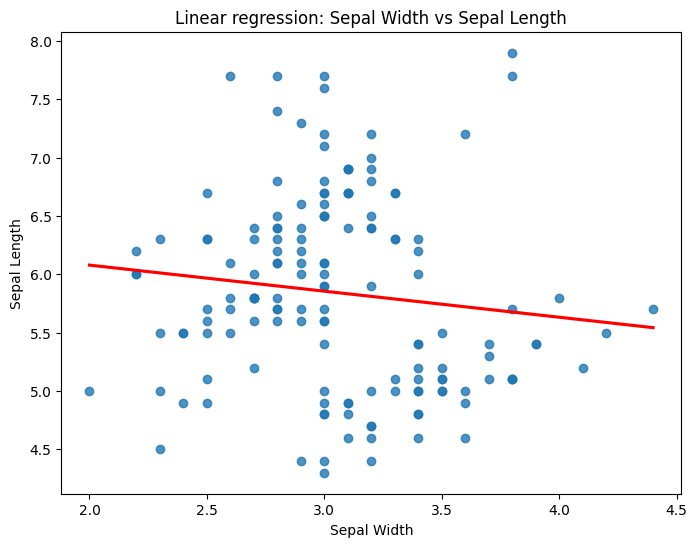


Linear Regression Coefficient:
Coefficient (b1): -0.2234
Intercept (b0): 6.5262

Linear Regression Equation: 
Sepal Length = 6.5262 + -0.2234 * Sepal Width


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Load the Iris dataset
iris = sns.load_dataset("iris")

#Display a preview of the dataset
print("Preview of the Iris Dataset:")
print(iris.head())

# Define the independent variable (sepal width) and dependent variable (sepal length)
X = iris[["sepal_width"]]
y = iris["sepal_length"]

# Create a linear regression model
model = LinearRegression()

# Fit the linear regression model
model.fit(X,y)

# Predict sepal length using the model
y_pred = model.predict(X)

#Calculate evaluation metrics
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y,y_pred)

# Print model evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r_squared:.4f}")

# Visualize the regression line
plt.figure(figsize=(8,6))
sns.regplot(x=X["sepal_width"], y=y, ci=None, line_kws={"color": "red"})
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.title("Linear regression: Sepal Width vs Sepal Length")
plt.show()

#Print the coefficeints and intercept of the linear regression model
print("\nLinear Regression Coefficient:")
print(f"Coefficient (b1): {model.coef_[0]:.4f}")
print(f"Intercept (b0): {model.intercept_:.4f}")

#Display the mathematical equation of the linear regression model
print("\nLinear Regression Equation: ")
print(f"Sepal Length = {model.intercept_:.4f} + {model.coef_[0]:.4f} * Sepal Width")

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Load the Iris dataset
iris = sns.load_dataset("iris")

# Create a list to store the results
results = []

# Define the list of independent variables (features)
features = ["sepal_width", "petal_length", "petal_width"]

# Iterate over each feature
for feature in features:
    # Define the independent variable (feature) and dependent variable (sepal length)
    X = iris[[feature]]
    y = iris["sepal_length"]

    # Create a linear regression model using Scikit-Learn
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Calculate evaluation metrics using Scikit-Learn
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y, y_pred)

    # Add results to the list
    results.append({"Model": "Scikit-Learn", "Feature": feature, "RMSE": rmse, "R-Squared": r_squared})

    # Create a linear regression model using StatsModels
    X_sm = sm.add_constant(X)  # Add a constant term (intercept) to the model
    model_sm = sm.OLS(y, X_sm).fit()
    y_pred_sm = model_sm.predict(X_sm)

    # Calculate evaluation metrics using StatsModels
    rmse_sm = np.sqrt(mean_squared_error(y, y_pred_sm))
    r_squared_sm = model_sm.rsquared

    # Add results to the list
    results.append({"Model": "StatsModels", "Feature": feature, "RMSE": rmse_sm, "R-Squared": r_squared_sm})

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results)

# Display the results table
print(results_df)



          Model       Feature      RMSE  R-Squared
0  Scikit-Learn   sepal_width  0.819578   0.013823
1   StatsModels   sepal_width  0.819578   0.013823
2  Scikit-Learn  petal_length  0.404352   0.759955
3   StatsModels  petal_length  0.404352   0.759955
4  Scikit-Learn   petal_width  0.474797   0.669028
5   StatsModels   petal_width  0.474797   0.669028


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Load the Iris dataset
iris = sns.load_dataset("iris")

# Define the list of independent variables (features)
features = ["sepal_width", "petal_length", "petal_width"]

# Create DataFrames to store the results for Scikit-Learn and StatsModels
results_sklearn = pd.DataFrame(columns=["Feature", "RMSE", "R-Squared"])
results_statsmodels = pd.DataFrame(columns=["Feature", "RMSE", "R-Squared"])

# Iterate over each feature
for feature in features:
    # Define the independent variable (feature) and dependent variable (sepal length)
    X = iris[[feature]]
    y = iris["sepal_length"]

    # Create a linear regression model using Scikit-Learn
    model_sklearn = LinearRegression()
    model_sklearn.fit(X, y)
    y_pred_sklearn = model_sklearn.predict(X)

    # Calculate evaluation metrics using Scikit-Learn
    mse_sklearn = mean_squared_error(y, y_pred_sklearn)
    rmse_sklearn = np.sqrt(mse_sklearn)
    r_squared_sklearn = r2_score(y, y_pred_sklearn)

    # Add results to the Scikit-Learn DataFrame
    results_sklearn = pd.concat([results_sklearn, pd.DataFrame({"Feature": [feature], "RMSE": [rmse_sklearn], "R-Squared": [r_squared_sklearn]})])

    # Create a linear regression model using StatsModels
    X_sm = sm.add_constant(X)  # Add a constant term (intercept) to the model
    model_statsmodels = sm.OLS(y, X_sm).fit()
    y_pred_statsmodels = model_statsmodels.predict(X_sm)

    # Calculate evaluation metrics using StatsModels
    rmse_statsmodels = np.sqrt(mean_squared_error(y, y_pred_statsmodels))
    r_squared_statsmodels = model_statsmodels.rsquared

    # Add results to the StatsModels DataFrame
    results_statsmodels = pd.concat([results_statsmodels, pd.DataFrame({"Feature": [feature], "RMSE": [rmse_statsmodels], "R-Squared": [r_squared_statsmodels]})])

# Display the results for Scikit-Learn
print("Results for Scikit-Learn:")
print(results_sklearn)

# Display the results for StatsModels
print("\nResults for StatsModels:")
print(results_statsmodels)


Results for Scikit-Learn:
        Feature      RMSE  R-Squared
0   sepal_width  0.819578   0.013823
0  petal_length  0.404352   0.759955
0   petal_width  0.474797   0.669028

Results for StatsModels:
        Feature      RMSE  R-Squared
0   sepal_width  0.819578   0.013823
0  petal_length  0.404352   0.759955
0   petal_width  0.474797   0.669028
